In [1]:
import pandas as pd

def read_market_data(fileName):
    df = pd.read_csv(fileName).fillna("")
    cols = df.columns.tolist()[0].split(';')
    fin = pd.DataFrame(df.iloc[:,0].apply(lambda x: x.split(';')).values.tolist(),columns= cols)
    to_float_cols = ['day','timestamp','bid_price_1','bid_volume_1','bid_price_2','bid_volume_2','bid_price_3','bid_volume_3','ask_price_1','ask_volume_1','ask_price_2','ask_volume_2','ask_price_3','ask_volume_3','mid_price','profit_and_loss']
    fin[to_float_cols] =  fin[to_float_cols].applymap(lambda x: float(x) if x != '' else '')
    return fin

def split_data_by_product(df):
    markets = dict()
    products  = df['product'].unique().tolist()
    for prod in products:
        markets[prod]= df[df['product']==prod]
    return markets

In [2]:
data = read_market_data('data.csv')
markets = split_data_by_product(data)
data = markets['BANANAS']['bid_price_1']

<AxesSubplot:>

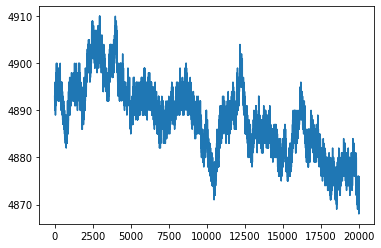

In [3]:
data.plot()
short_rolling = data.rolling(window=20).mean()
long_rolling = data.rolling(window=100).mean()
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'MSFT'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')
